# BUSINESS UNDERSTANDING
1) Define stakeholder and business problem
Choose a healthcare company focused on pediatric care or mental health.
Business Problem: "How can we improve the early detection of autism in children to enhance patient outcomes and reduce diagnostic costs?"

2) Set clear Objectives
Improve diagnostic efficiency, enhance patient care, and generate revenue.
Ensure these objectives are directly linked to your model's outcomes.(Add onto that)

3) Communicate the rational say why machine learning is suitable



# DATA UNDERSTANDING
1) Choose and Describe the Dataset:

Autism Spectrum Disorder Screening Data (Children).
Explain the data’s relevance, including the target variable and key features (e.g., child’s age, scores from screening tests).

2) Explore the dataset to understand its structure, features, target variable, and any missing or non-numeric data. Use descriptive statistics and visualizations (like histograms, box plots, and scatter plots) to identify patterns or anomalies.

In [100]:
# import the neessary libraries that will be utilized for data understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



Hiii


In [101]:
# Load the dataset
file_path = r"C:\Users\Administrator\Documents\Moringa\Phase 3\Autism Project\Autism-Child-Data.csv"

df = pd.read_csv(file_path)
df.head() # Enables us to preview the first 5 rows of the data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

Explain the data set has ? to fill in for the missing values and why we have to change it to null values

In [103]:
# Replace The question marks with NAN Values
df.replace('?', pd.NA, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              288 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        249 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

Identify the columns with missing values and see how to impute them

In [104]:
#Convert Age to a numeric
df['age']= pd.to_numeric(df['age'], errors= 'coerce')

# Work on the missing values
# impute the numerical columns with median
df['age'].fillna( df['age'].median(), inplace= True)

#impute the categorical columns with mode()
df['ethnicity'].fillna( df['ethnicity'].mode()[0], inplace= True)
df['relation'].fillna( df['relation'].mode()[0], inplace= True)

In [105]:
# Handle data quality issues such 
# Rename 'jundice' to 'jaundice' using `rename`
df.rename(columns={'jundice': 'jaundice'}, inplace= True)
# Rename self to Self
df['relation']= df['relation'].str.capitalize() # the capitalize function ensures uniform capitlization throughout the column
df['relation'].value_counts() # This function calls the composition of the column to ensure that the changes have been made


relation
Parent                      257
Relative                     17
Health care professional     13
Self                          5
Name: count, dtype: int64

We can now check to confirm that all the missing values have been handles using is null and describe

In [106]:
# Check for missing values
df.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [107]:
# Get a summary of the numerical features
print("Basic statistics for numerical features: \n", df.describe() )


Basic statistics for numerical features: 
                id    A1_Score    A2_Score    A3_Score    A4_Score    A5_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean   146.500000    0.633562    0.534247    0.743151    0.551370    0.743151   
std     84.437354    0.482658    0.499682    0.437646    0.498208    0.437646   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     73.750000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    146.500000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%    219.250000    1.000000    1.000000    1.000000    1.000000    1.000000   
max    292.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A6_Score    A7_Score    A8_Score    A9_Score   A10_Score         age  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.712329    0.606164    0.496575    0.493151    0.726027

In [108]:
# Summary of categorical features
print("Summary of categorical features: \n", df.describe( include= ['object']))

Summary of categorical features: 
        gender       ethnicity jaundice austim   contry_of_res used_app_before  \
count     292             292      292    292             292             292   
unique      2              10        2      2              52               2   
top         m  White-European       no     no  United Kingdom              no   
freq      208             151      212    243              49             281   

          age_desc relation Class/ASD  
count          292      292       292  
unique           1        4         2  
top     4-11 years   Parent        NO  
freq           292      257       151  


Visualize the current districution relations then say why this is neccesary

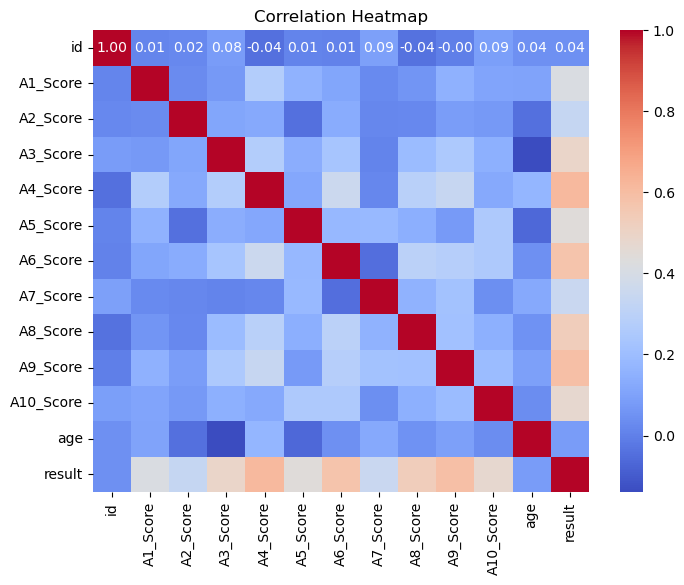

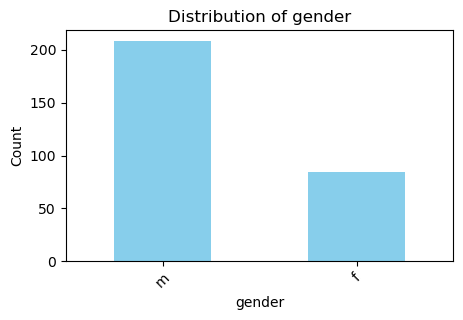

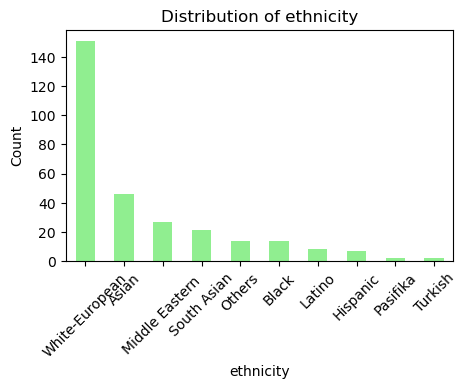

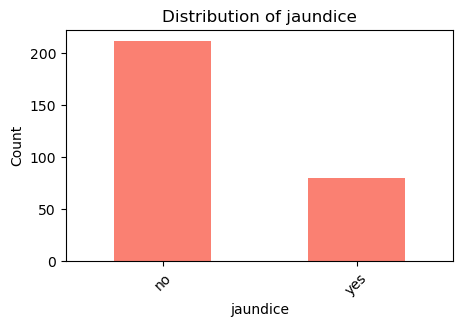

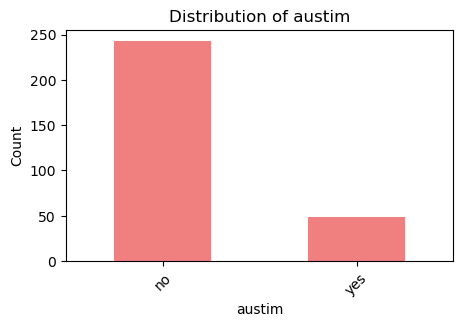

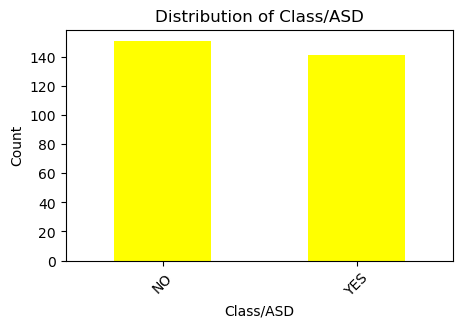

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Convert any non-numeric columns to numeric if possible
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Heatmap to show correlations between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for categorical variables

categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'Class/ASD']
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'yellow']

for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(5, 3))
    df[col].value_counts().plot(kind='bar', color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



Explain why we are using Z score to check for outliers and mention what other way can be used.

 # Data Preparation
 We start by feature engineering state what it is and why and how it can be used

In [110]:
# Check for outliers using Z-scores
z_scores = np.abs(stats.zscore(df[['age', 'result']]))
outliers = (z_scores > 3).all(axis=1)
print("Number of outliers detected:", np.sum(outliers))

Number of outliers detected: 0


Feature engineering explain what it is and why we are choosing this specific data and the importance

In [111]:
# Define bins for 1-year intervals
bins= range(4,12) # ages are from 4 to 11
labels= [f'{i}-{i+1}' for i in range(4,11)]

#Bin the age column
df['age_binned']=pd.cut(df['age'], bins= bins, labels= labels, right= False)

# Check the distribution of binned ages
df['age_binned'].value_counts()

age_binned
4-5      92
5-6      45
6-7      43
7-8      27
8-9      21
9-10     20
10-11    18
Name: count, dtype: int64

In [112]:
# We start by identifying the categorical columns and one-hot encode The categorical variables
df_encoded=pd.get_dummies(df, columns= ['gender', 'ethnicity', 'jaundice', 'austim', 'relation'])

In [ ]:
# We start by identifying the categorical columns and one-hot encode The categorical variables
categorical_columns=['gender', 'ethnicity', 'jaundice', 'austim', 'relation']
X_encoded= pd.get_dummies(df, columns= ['gender', 'ethnicity', 'jaundice', 'austim', 'relation']

Explain why we can't choose country of res

In [113]:
df['contry_of_res'].value_counts()

contry_of_res
United Kingdom           49
India                    42
United States            42
Australia                23
Jordan                   20
New Zealand              13
Egypt                     9
United Arab Emirates      7
Canada                    7
Bangladesh                6
Philippines               4
Pakistan                  4
Saudi Arabia              4
Russia                    3
Syria                     3
Iraq                      3
Qatar                     3
Armenia                   3
Libya                     3
Afghanistan               2
Georgia                   2
Bahrain                   2
Italy                     2
Malaysia                  2
Austria                   2
Brazil                    2
Turkey                    2
Lebanon                   2
Mexico                    2
South Africa              2
Ghana                     1
U.S. Outlying Islands     1
Nigeria                   1
Nepal                     1
Isle of Man               1
China 

Feature selection and say why they are being chosen

In [116]:
df['Class/ASD'].value_counts()

Class/ASD
NO     151
YES    141
Name: count, dtype: int64

Say what it does and why these two-feature scaling

In [124]:
# One-hot encode the categorical variables
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'relation']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Drop 'country_of_res' as it does not provide useful information for prediction
df_encoded.drop(columns=['contry_of_res'], inplace=True)

# Prepare the feature set and target variable
X = df_encoded.drop(columns=['Class/ASD'])
y = df_encoded['Class/ASD'].map({'NO': 0, 'YES': 1})

Handling imbalanced data we wont because they are almost balanced


In [125]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class balance
print("Class distribution in training set:\n", y_train.value_counts())

Class distribution in training set:
 Class/ASD
1    104
0    100
Name: count, dtype: int64


In [126]:
# Feature scaling for numerical columns
scaler = StandardScaler()
num_cols = ['age', 'result']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [127]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

 # Logistic Regression
 

In [130]:
# Decision Tree
print("\nTraining Decision Tree...")
dtree = models['Decision Tree']
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
cv_scores_dt = cross_val_score(dtree, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores for Decision Tree: {cv_scores_dt}")
print(f"Mean Cross-Validation F1 Score for Decision Tree: {cv_scores_dt.mean()}")




Training Decision Tree...


ValueError: could not convert string to float: 'no'

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg = models['Logistic Regression']
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores for Logistic Regression: {cv_scores_lr}")
print(f"Mean Cross-Validation F1 Score for Logistic Regression: {cv_scores_lr.mean()}")

In [ ]:
# Random Forest
print("\nTraining Random Forest...")
rf = models['Random Forest']
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_dt))
cv_scores_dt = cross_val_score(dtree, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores for Decision Tree: {cv_scores_dt}")
print(f"Mean Cross-Validation F1 Score for Decision Tree: {cv_scores_dt.mean()}")



In [ ]:
# Ridge Regression
print("Training Ridge Regression...")
ridge = models['Ridge Regression']
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, np.round(y_pred_ridge)))
print("Classification Report:\n", classification_report(y_test, np.round(y_pred_ridge)))
print("Accuracy Score:", accuracy_score(y_test, np.round(y_pred_ridge)))
print("ROC AUC Score:", roc_auc_score(y_test, np.round(y_pred_ridge)))
print("F1 Score:", f1_score(y_test, np.round(y_pred_ridge)))
cv_scores_ridge = cross_val_score(ridge, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores for Ridge Regression: {cv_scores_ridge}")
print(f"Mean Cross-Validation F1 Score for Ridge Regression: {cv_scores_ridge.mean()}")

In [ ]:
# Lasso Regression
print("Training Lasso Regression...")
lasso = models['Lasso Regression']
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, np.round(y_pred_lasso)))
print("Classification Report:\n", classification_report(y_test, np.round(y_pred_lasso)))
print("Accuracy Score:", accuracy_score(y_test, np.round(y_pred_lasso)))
print("ROC AUC Score:", roc_auc_score(y_test, np.round(y_pred_lasso)))
print("F1 Score:", f1_score(y_test, np.round(y_pred_lasso)))
cv_scores_lasso = cross_val_score(lasso, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores for Lasso Regression: {cv_scores_lasso}")
print(f"Mean Cross-Validation F1 Score for Lasso Regression: {cv_scores_lasso.mean()}")

In [ ]:
# Compare and save the best model
results = {
    'Logistic Regression': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_lr),
        'Classification Report': classification_report(y_test, y_pred_lr),
        'Accuracy Score': accuracy_score(y_test, y_pred_lr),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_lr)
    },
    'Decision Tree': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
        'Classification Report': classification_report(y_test, y_pred_dt),
        'Accuracy Score': accuracy_score(y_test, y_pred_dt),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_dt)
    },
    'Random Forest': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
        'Classification Report': classification_report(y_test, y_pred_rf),
        'Accuracy Score': accuracy_score(y_test, y_pred_rf),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_rf)
    }
}

best_model_name = max(results, key=lambda k: results[k]['ROC AUC Score'])
print(f"\nBest Model: {best_model_name}\n")
print(results[best_model_name])

# Save the best model
import joblib
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")